# LeNet-5

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [17]:
print(os.listdir("../Dataset"))

['test.csv', 'train.csv', 'sample_submission.csv']


# Load Data

In [3]:
#Image size is 28x28. 784

In [18]:
df_train = pd.read_csv('../Dataset/train.csv')
print (df_train.shape)
df_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_train = df_train.iloc[:, 1:]
# alternatively you can write X_train = df_train.drop(labels=['label'],axis=1)
Y_train = df_train.iloc[:, 0]
# alternatively you can write Y_train = df_train['label']

In [20]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

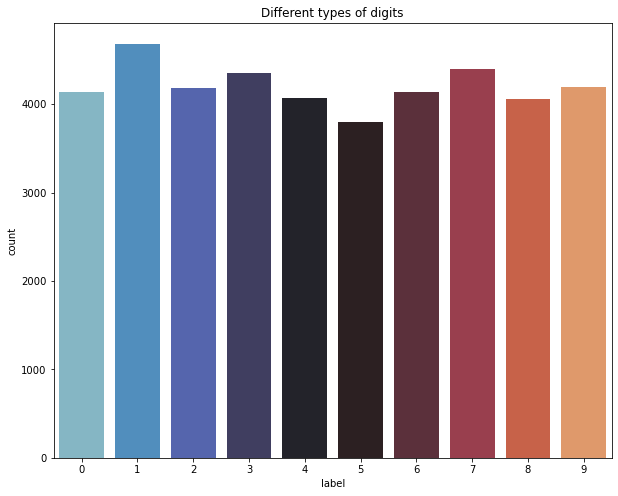

In [22]:
# visualize number of digits classes
plt.figure(figsize=(10,8))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Different types of digits")
Y_train.value_counts()

In [23]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [24]:
print (X_train.shape)
print (Y_train.shape)

(42000, 784)
(42000,)


In [25]:
# Normalize inputs ;  feature engineering
X_train = X_train / 255.0

# Plot Digits

In [26]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

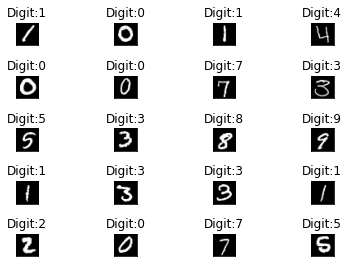

In [9]:
plot_digits(X_train, Y_train)

In [28]:
#Train-Test Split
#X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True, random_state=2022)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True, random_state=2022)


In [29]:
print ('x_train shape:',x_train.shape)
print ('y_train shape:',y_train.shape)
print ('x_val shape:',x_val.shape)
print ('y_val shape:',y_val.shape)

x_train shape: (29400, 784)
y_train shape: (29400,)
x_val shape: (12600, 784)
y_val shape: (12600,)


In [30]:
print (y_train)
print (y_val)

[4 5 4 ... 7 4 7]
[1 5 6 ... 3 2 1]


In [31]:
# Label Encoding for one-hot encoding
from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

# alternatively below can also be followed 
# y_train = pd.get_dummies(y_train).values
# y_val = pd.get_dummies(y_val).values

In [32]:
print (y_train[2])
print (y_val[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [33]:
#CNN accepts only 3D image shape we need to reshape the input 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [34]:
print ('X_train shape:', x_train.shape)
print ('X_val:',x_val.shape)

X_train shape: (29400, 28, 28, 1)
X_val: (12600, 28, 28, 1)


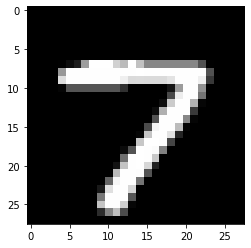

In [35]:
plt.imshow(x_train[29399],cmap='gray')
plt.show()

In [36]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [37]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [38]:
#adam = Adam(lr=5e-4)
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [39]:
# Set a learning rate annealer to reduce learning rate if the learning stagnates
# monitor is the quantity to be measured
# factor by which learning rate will be reduced
# number of epochs with no improvement in monitor function after which learning rate will be reduced
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [40]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(x_train)
# options
#featurewise_center=False,  # set input mean to 0 over the dataset
#samplewise_center=False,  # set each sample mean to 0
#featurewise_std_normalization=False,  # divide inputs by std of the dataset
#samplewise_std_normalization=False,  # divide each input by its std
#zca_whitening=False,  # dimesion reduction
#rotation_range=5,  # randomly rotate images in the range 5 degrees
#zoom_range = 0.1, # Randomly zoom image 10%
#width_shift_range=0.1,  # randomly shift images horizontally 10%
#height_shift_range=0.1,  # randomly shift images vertically 10%
#horizontal_flip=False,  # randomly flip images
#vertical_flip=False  # randomly flip images


In [41]:
len(x_train)

29400

In [42]:
batch_size = 100
model_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=100), steps_per_epoch=len(x_train)//batch_size, 
                    epochs=5, validation_data=(x_val, y_val), callbacks=[reduce_lr])

/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2024-04-17 15:02:19.760703: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
294/294 [==============================] - 20s 65ms/step - loss: 0.8783 - accuracy: 0.7079 - val_loss: 0.0983 - val_accuracy: 0.9686
Epoch 2/5
294/294 [==============================] - 18s 62ms/step - loss: 0.1473 - accuracy: 0.9528 - val_loss: 0.0539 - val_accuracy: 0.9830
Epoch 3/5
294/294 [==============================] - 15s 50ms/step - loss: 0.0939 - accuracy: 0.9708 - val_loss: 0.0467 - val_accuracy: 0.9855
Epoch 4/5
294/294 [==============================] - 16s 56ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0544 - val_accuracy: 0.9833
Epoch 5/5
294/294 [==============================] - 15s 51ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0448 - val_accuracy: 0.9865


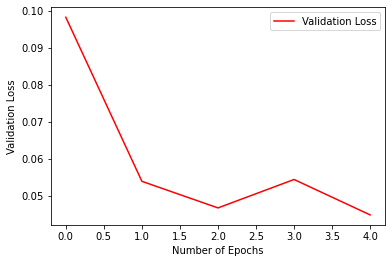

In [43]:
plt.plot(model_history.history['val_loss'], color='r', label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

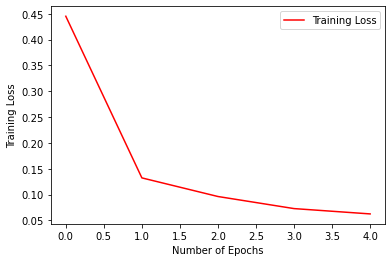

In [44]:
plt.plot(model_history.history['loss'], color='r', label="Training Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

In [45]:
score = model.evaluate(x_val, y_val, batch_size=32)

394/394 [==============================] - 2s 4ms/step - loss: 0.0448 - accuracy: 0.9865


In [46]:
score  # val_loss and val_accuracy

[0.04476546496152878, 0.9865079522132874]

# Saving model


In [34]:
model.save("Sequential.h5")

# Let's predict 

In [47]:
y_pred = model.predict(x_val)

In [48]:
print (y_pred[0])

[4.5239656e-07 9.9991298e-01 1.2587699e-07 3.7986516e-09 5.8066967e-06
 3.6795527e-06 7.4862015e-07 3.3862248e-06 7.1636183e-05 1.1908858e-06]


In [49]:
np.max(y_pred[0])

0.999913

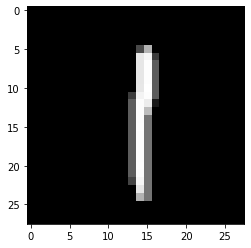

In [50]:
plt.imshow(x_val[0],cmap='gray')
plt.show()

In [47]:
len(y_pred)

12600

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
# conversion to one-hot encoding
y_pred = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_matrix_results = confusion_matrix(y_true, y_pred) 

In [40]:
print (confusion_matrix_results)

[[1215    0    1    1    0    0    4    0    0    0]
 [   0 1357    7    0    0    0    1    5   10    2]
 [   0    1 1218    3    0    0    0    2    1    1]
 [   0    0    1 1279    0    0    0    0    3    4]
 [   0    0    2    0 1215    0    3    0    0   10]
 [   0    0    0   11    0 1118    1    0    4    4]
 [   5    0    1    0    1    0 1279    0    1    0]
 [   0    1    4    1    3    0    0 1349    0    1]
 [   1    1    3    0    0    4    3    1 1173    2]
 [   0    0    0    1    5    1    0    7    4 1264]]


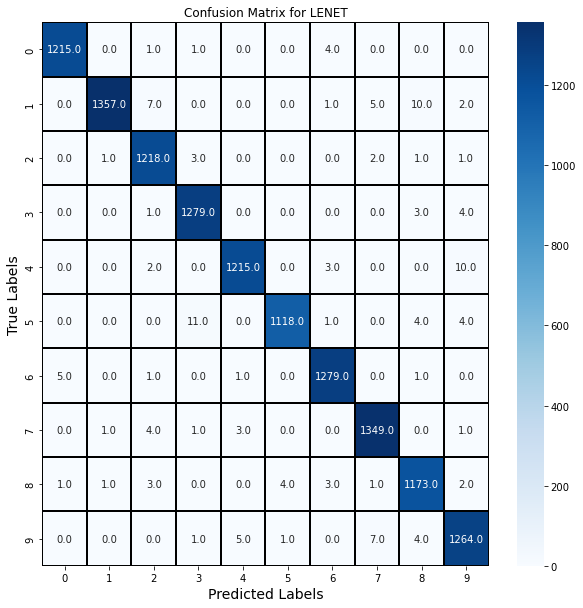

In [41]:
# plot the confusion matrix, NOT RECOMMENDED
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix_results, annot=True, linewidths=0.05,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Labels",fontsize=14)
plt.ylabel("True Labels",fontsize=14)
plt.title("Confusion Matrix for LENET")
plt.show()

In [100]:
# For test data, Y_Test is not available
# so only predictions can be done and not accuracy assessment
#df_test = pd.read_csv('Dataset/test.csv')
#X_test = np.array(df_test)
#X_test = X_test/255.0
#X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
#Y_test = model.predict(X_test)
#Y_test = np.argmax(Y_test, axis=1)
#Y_test[:5]
# create submission file
#df_out = pd.read_csv('Dataset/sample_submission.csv')
#df_out['Label'] = Y_test
#df_out.head()
# df_out.to_csv('out.csv', index=False)

# Resource

In [1]:
# https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48/notebook